In [156]:
import pandas as pd


# ARXIV data


In [157]:
data_arxiv = pd.read_csv("arxiv_ai.csv")

In [158]:
data_arxiv.head()

authors categories  \
0            [arxiv.Result.Author('M. L. Ginsberg')]  ['cs.AI']   
1             [arxiv.Result.Author('M. P. Wellman')]  ['cs.AI']   
2  [arxiv.Result.Author('I. P. Gent'), arxiv.Resu...  ['cs.AI']   
3  [arxiv.Result.Author('F. Bergadano'), arxiv.Re...  ['cs.AI']   
4  [arxiv.Result.Author('J. C. Schlimmer'), arxiv...  ['cs.AI']   

                                             comment  doi  \
0  See http://www.jair.org/ for an online appendi...  NaN   
1  See http://www.jair.org/ for any accompanying ...  NaN   
2  See http://www.jair.org/ for any accompanying ...  NaN   
3  See http://www.jair.org/ for any accompanying ...  NaN   
4  See http://www.jair.org/ for an online appendi...  NaN   

                            entry_id  \
0  http://arxiv.org/abs/cs/9308101v1   
1  http://arxiv.org/abs/cs/9308102v1   
2  http://arxiv.org/abs/cs/9309101v1   
3  http://arxiv.org/abs/cs/9311101v1   
4  http://arxiv.org/abs/cs/9311102v1   

                                         journal_ref  \
0  Journal of Artificial Intelligence Research, V...   
1  Journal of Artificial Intelligence Research, V...   
2  Journal of Artificial Intelligence Research, V...   
3  Journal of Artificial Intelligence Research, V...   
4  Journal of Artificial Intelligence Research, V...   

                             pdf_url primary_category  \
0  http://arxiv.org/pdf/cs/9308101v1            cs.AI   
1  http://arxiv.org/pdf/cs/9308102v1            cs.AI   
2  http://arxiv.org/pdf/cs/9309101v1            cs.AI   
3  http://arxiv.org/pdf/cs/9311101v1            cs.AI   
4  http://arxiv.org/pdf/cs/9311102v1            cs.AI   

                   published  \
0  1993-08-01 00:00:00+00:00   
1  1993-08-01 00:00:00+00:00   
2  1993-09-01 00:00:00+00:00   
3  1993-11-01 00:00:00+00:00   
4  1993-11-01 00:00:00+00:00   

                                             summary  \
0  Because of their occasional need to return to ...   
1  Market price systems constitute a well-underst...   
2  We describe an extensive study of search in GS...   
3  As real logic programmers normally use cut (!)...   
4  To support the goal of allowing users to recor...   

                                               title  \
0                               Dynamic Backtracking   
1  A Market-Oriented Programming Environment and ...   
2            An Empirical Analysis of Search in GSAT   
3  The Difficulties of Learning Logic Programs wi...   
4  Software Agents: Completing Patterns and Const...   

                     updated  
0  1993-08-01 00:00:00+00:00  
1  1993-08-01 00:00:00+00:00  
2  1993-09-01 00:00:00+00:00  
3  1993-11-01 00:00:00+00:00  
4  1993-11-01 00:00:00+00:00

In [159]:
data_arxiv.describe()

authors categories  \
count                                        10000      10000   
unique                                        8614        918   
top     [arxiv.Result.Author('Joseph Y. Halpern')]  ['cs.AI']   
freq                                            18       7770   

                                                  comment  \
count                                                6136   
unique                                               4088   
top     See http://www.jair.org/ for any accompanying ...   
freq                                                   81   

                                       doi                           entry_id  \
count                                 1389                              10000   
unique                                1387                              10000   
top     10.4114/intartif.vol22iss64pp47-62  http://arxiv.org/abs/cs/9308101v1   
freq                                     2                                  1   

                                              journal_ref  \
count                                                2028   
unique                                               2010   
top     Journal of Computing, Vol. 2, No. 6, June 2010...   
freq                                                    5   

                                  pdf_url primary_category  \
count                               10000            10000   
unique                              10000               51   
top     http://arxiv.org/pdf/cs/9308101v1            cs.AI   
freq                                    1             9280   

                        published  \
count                       10000   
unique                       9876   
top     2012-02-14 16:41:17+00:00   
freq                           35   

                                                  summary  \
count                                               10000   
unique                                               9992   
top     Mutual information is widely used in artificia...   
freq                                                    2   

                                                    title  \
count                                               10000   
unique                                               9980   
top     Defining Relative Likelihood in Partially-Orde...   
freq                                                    2   

                          updated  
count                       10000  
unique                       9876  
top     2012-02-14 16:41:17+00:00  
freq                           35

In [160]:
data_arxiv['authors'][2].replace('[','')

"arxiv.Result.Author('I. P. Gent'), arxiv.Result.Author('T. Walsh')]"

In [161]:
data_arxiv['authors'][2].replace(']','')

"[arxiv.Result.Author('I. P. Gent'), arxiv.Result.Author('T. Walsh')"

In [162]:
data_arxiv['authors_list'] = [
    [item.strip() for item in s.strip('[]').split(',')]
    for s in data_arxiv['authors']
]

In [163]:
data_arxiv['authors_list'][5]

["arxiv.Result.Author('M. Buchheit')",
 "arxiv.Result.Author('F. M. Donini')",
 "arxiv.Result.Author('A. Schaerf')"]

In [164]:
data_arxiv.head(1)

authors categories  \
0  [arxiv.Result.Author('M. L. Ginsberg')]  ['cs.AI']   

                                             comment  doi  \
0  See http://www.jair.org/ for an online appendi...  NaN   

                            entry_id  \
0  http://arxiv.org/abs/cs/9308101v1   

                                         journal_ref  \
0  Journal of Artificial Intelligence Research, V...   

                             pdf_url primary_category  \
0  http://arxiv.org/pdf/cs/9308101v1            cs.AI   

                   published  \
0  1993-08-01 00:00:00+00:00   

                                             summary                 title  \
0  Because of their occasional need to return to ...  Dynamic Backtracking   

                     updated                             authors_list  
0  1993-08-01 00:00:00+00:00  [arxiv.Result.Author('M. L. Ginsberg')]

# Очистка

Все данные уникальны

In [165]:
data_arxiv = data_arxiv.dropna(subset=['summary'])
data_arxiv = data_arxiv[data_arxiv['summary'] != '']
data_arxiv = data_arxiv[data_arxiv['pdf_url'] != '']
data_arxiv = data_arxiv.dropna(subset=['pdf_url'])


In [166]:
len(data_arxiv['entry_id'].unique())

10000

# NIPS data

In [167]:
data_nips = pd.read_csv("papers.csv")

In [168]:
data_nips.head()

id  year                                              title event_type  \
0     1  1987  Self-Organization of Associative Database and ...        NaN   
1    10  1987  A Mean Field Theory of Layer IV of Visual Cort...        NaN   
2   100  1988  Storing Covariance by the Associative Long-Ter...        NaN   
3  1000  1994  Bayesian Query Construction for Neural Network...        NaN   
4  1001  1994  Neural Network Ensembles, Cross Validation, an...        NaN   

                                            pdf_name          abstract  \
0  1-self-organization-of-associative-database-an...  Abstract Missing   
1  10-a-mean-field-theory-of-layer-iv-of-visual-c...  Abstract Missing   
2  100-storing-covariance-by-the-associative-long...  Abstract Missing   
3  1000-bayesian-query-construction-for-neural-ne...  Abstract Missing   
4  1001-neural-network-ensembles-cross-validation...  Abstract Missing   

                                          paper_text  
0  767\n\nSELF-ORGANIZATION OF ASSOCIATIVE DATABA...  
1  683\n\nA MEAN FIELD THEORY OF LAYER IV OF VISU...  
2  394\n\nSTORING COVARIANCE BY THE ASSOCIATIVE\n...  
3  Bayesian Query Construction for Neural\nNetwor...  
4  Neural Network Ensembles, Cross\nValidation, a...

In [169]:
data_nips.shape

(7241, 7)

In [170]:
data_nips.describe()

id         year
count  7241.000000  7241.000000
mean   3655.912167  2006.439718
std    2098.435219     8.759919
min       1.000000  1987.000000
25%    1849.000000  2000.000000
50%    3659.000000  2009.000000
75%    5473.000000  2014.000000
max    7284.000000  2017.000000

In [171]:
full_paper_nips = data_nips.dropna(subset=['paper_text'])
full_paper_nips = data_nips[data_nips['paper_text'] != '']


In [172]:
abstract_nips = data_nips.dropna(subset=['abstract'])
abstract_nips = data_nips[data_nips['abstract'] != 'Abstract Missing']
abstract_nips = data_nips[data_nips['abstract'] != '']


In [173]:
data_nips[data_nips['abstract'] == 'Abstract Missing']

id  year                                              title  \
0        1  1987  Self-Organization of Associative Database and ...   
1       10  1987  A Mean Field Theory of Layer IV of Visual Cort...   
2      100  1988  Storing Covariance by the Associative Long-Ter...   
3     1000  1994  Bayesian Query Construction for Neural Network...   
4     1001  1994  Neural Network Ensembles, Cross Validation, an...   
...    ...   ...                                                ...   
7236   994  1994                Single Transistor Learning Synapses   
7237   996  1994  Bias, Variance and the Combination of Least Sq...   
7238   997  1994          A Real Time Clustering CMOS Neural Engine   
7239   998  1994  Learning direction in global motion: two class...   
7240   999  1994  Correlation and Interpolation Networks for Rea...   

     event_type                                           pdf_name  \
0           NaN  1-self-organization-of-associative-database-an...   
1           NaN  10-a-mean-field-theory-of-layer-iv-of-visual-c...   
2           NaN  100-storing-covariance-by-the-associative-long...   
3           NaN  1000-bayesian-query-construction-for-neural-ne...   
4           NaN  1001-neural-network-ensembles-cross-validation...   
...         ...                                                ...   
7236        NaN        994-single-transistor-learning-synapses.pdf   
7237        NaN  996-bias-variance-and-the-combination-of-least...   
7238        NaN  997-a-real-time-clustering-cmos-neural-engine.pdf   
7239        NaN  998-learning-direction-in-global-motion-two-cl...   
7240        NaN  999-correlation-and-interpolation-networks-for...   

              abstract                                         paper_text  
0     Abstract Missing  767\n\nSELF-ORGANIZATION OF ASSOCIATIVE DATABA...  
1     Abstract Missing  683\n\nA MEAN FIELD THEORY OF LAYER IV OF VISU...  
2     Abstract Missing  394\n\nSTORING COVARIANCE BY THE ASSOCIATIVE\n...  
3     Abstract Missing  Bayesian Query Construction for Neural\nNetwor...  
4     Abstract Missing  Neural Network Ensembles, Cross\nValidation, a...  
...                ...                                                ...  
7236  Abstract Missing  Single Transistor Learning Synapses\n\nPaul Ha...  
7237  Abstract Missing  Bias, Variance and the Combination of\nLeast S...  
7238  Abstract Missing  A Real Time Clustering CMOS\nNeural Engine\nT....  
7239  Abstract Missing  Learning direction in global motion: two\nclas...  
7240  Abstract Missing  Correlation and Interpolation Networks for\nRe...  

[3317 rows x 7 columns]

In [174]:
data_nips[data_nips['abstract'] != 'Abstract Missing']

id  year                                              title  \
941   1861  2000   Algorithms for Non-negative Matrix Factorization   
1067  1975  2001  Characterizing Neural Gain Control using Spike...   
2384  3163  2007                        Competition Adds Complexity   
2385  3164  2007  Efficient Principled Learning of Thin Junction...   
2388  3167  2007     Regularized Boost for Semi-Supervised Learning   
...    ...   ...                                                ...   
6943  7280  2017  On Separability of Loss Functions, and Revisit...   
6944  7281  2017            Maxing and Ranking with Few Assumptions   
6945  7282  2017                  On clustering network-valued data   
6946  7283  2017  A General Framework for Robust Interactive Lea...   
6947  7284  2017  Multi-view Matrix Factorization for Linear Dyn...   

     event_type                                           pdf_name  \
941         NaN  1861-algorithms-for-non-negative-matrix-factor...   
1067        NaN  1975-characterizing-neural-gain-control-using-...   
2384        NaN               3163-competition-adds-complexity.pdf   
2385        NaN  3164-efficient-principled-learning-of-thin-jun...   
2388        NaN  3167-regularized-boost-for-semi-supervised-lea...   
...         ...                                                ...   
6943     Poster  7280-on-separability-of-loss-functions-and-rev...   
6944     Poster   7281-maxing-and-ranking-with-few-assumptions.pdf   
6945     Poster         7282-on-clustering-network-valued-data.pdf   
6946     Poster  7283-a-general-framework-for-robust-interactiv...   
6947     Poster  7284-multi-view-matrix-factorization-for-linea...   

                                               abstract  \
941   Non-negative matrix factorization (NMF) has pr...   
1067  Spike-triggered averaging techniques are effec...   
2384  It is known that determinining whether a DEC-P...   
2385  We present the first truly polynomial algorith...   
2388  Semi-supervised inductive learning concerns ho...   
...                                                 ...   
6943  We revisit the classical analysis of generativ...   
6944  PAC maximum                                   ...   
6945  Community detection, which focuses on clusteri...   
6946  We propose a general framework for interactive...   
6947  We consider maximum likelihood estimation of l...   

                                             paper_text  
941   Algorithms for Non-negative Matrix\nFactorizat...  
1067  Characterizing neural gain control using\nspik...  
2384  Competition adds complexity\n\nJudy Goldsmith\...  
2385  Efficient Principled Learning of Thin Junction...  
2388  Regularized Boost for Semi-Supervised Learning...  
...                                                 ...  
6943  On Separability of Loss Functions, and Revisit...  
6944  Maxing and Ranking with Few Assumptions\nMoein...  
6945  On clustering network-valued data\n\nSoumendu ...  
6946  A General Framework for Robust Interactive\nLe...  
6947  Multi-view Matrix Factorization for Linear\nDy...  

[3924 rows x 7 columns]

In [175]:
abstract_nips.shape

(7241, 7)

Все элементы уникальны

In [176]:
len(data_nips['title'].unique())

7241

# Подготовка 

In [177]:
authors_papers = pd.read_csv('paper_authors.csv')  # id,paper_id,author_id
authors = pd.read_csv('authors.csv')  # id,name 
paper_authors = authors_papers.merge(
    authors, 
    left_on='author_id', 
    right_on='id', 
    suffixes=('_link', '_author')
)
authors = authors.dropna(subset=['name'])
authors_papers = authors_papers.dropna(subset=['author_id'])

# Создаем строку "имя (id)" для каждого автора
paper_authors['author_with_id'] = paper_authors['name'] + ' (' + paper_authors['author_id'].astype(str) + ')'

# Группируем по paper_id и создаем список авторов
authors_lists = paper_authors.groupby('paper_id')['author_with_id'].apply(list).reset_index()
authors_lists.columns = ['paper_id', 'authors_list']

# Добавляем столбец authors_list к таблице papers
papers_with_authors = data_nips.merge(
    authors_lists, 
    left_on='id', 
    right_on='paper_id', 
    how='left'
)

# Удаляем лишний столбец paper_id если нужно
papers_with_authors = papers_with_authors.drop('paper_id', axis=1)


In [178]:
papers_with_authors

id  year                                              title  \
0        1  1987  Self-Organization of Associative Database and ...   
1       10  1987  A Mean Field Theory of Layer IV of Visual Cort...   
2      100  1988  Storing Covariance by the Associative Long-Ter...   
3     1000  1994  Bayesian Query Construction for Neural Network...   
4     1001  1994  Neural Network Ensembles, Cross Validation, an...   
...    ...   ...                                                ...   
7236   994  1994                Single Transistor Learning Synapses   
7237   996  1994  Bias, Variance and the Combination of Least Sq...   
7238   997  1994          A Real Time Clustering CMOS Neural Engine   
7239   998  1994  Learning direction in global motion: two class...   
7240   999  1994  Correlation and Interpolation Networks for Rea...   

     event_type                                           pdf_name  \
0           NaN  1-self-organization-of-associative-database-an...   
1           NaN  10-a-mean-field-theory-of-layer-iv-of-visual-c...   
2           NaN  100-storing-covariance-by-the-associative-long...   
3           NaN  1000-bayesian-query-construction-for-neural-ne...   
4           NaN  1001-neural-network-ensembles-cross-validation...   
...         ...                                                ...   
7236        NaN        994-single-transistor-learning-synapses.pdf   
7237        NaN  996-bias-variance-and-the-combination-of-least...   
7238        NaN  997-a-real-time-clustering-cmos-neural-engine.pdf   
7239        NaN  998-learning-direction-in-global-motion-two-cl...   
7240        NaN  999-correlation-and-interpolation-networks-for...   

              abstract                                         paper_text  \
0     Abstract Missing  767\n\nSELF-ORGANIZATION OF ASSOCIATIVE DATABA...   
1     Abstract Missing  683\n\nA MEAN FIELD THEORY OF LAYER IV OF VISU...   
2     Abstract Missing  394\n\nSTORING COVARIANCE BY THE ASSOCIATIVE\n...   
3     Abstract Missing  Bayesian Query Construction for Neural\nNetwor...   
4     Abstract Missing  Neural Network Ensembles, Cross\nValidation, a...   
...                ...                                                ...   
7236  Abstract Missing  Single Transistor Learning Synapses\n\nPaul Ha...   
7237  Abstract Missing  Bias, Variance and the Combination of\nLeast S...   
7238  Abstract Missing  A Real Time Clustering CMOS\nNeural Engine\nT....   
7239  Abstract Missing  Learning direction in global motion: two\nclas...   
7240  Abstract Missing  Correlation and Interpolation Networks for\nRe...   

                                           authors_list  
0              [Hisashi Suzuki (1), Suguru Arimoto (2)]  
1                        [Christopher L. Scofield (14)]  
2     [Terrence J. Sejnowski (54), Patric K. Stanton...  
3         [Gerhard Paass (902), J?rg Kindermann (1229)]  
4          [Anders Krogh (371), Jesper Vedelsby (1230)]  
...                                                 ...  
7236  [Carver Mead (43), Bradley A. Minch (1147), Pa...  
7237                                 [Ronny Meir (189)]  
7238  [Teresa Serrano-Gotarredona (1223), Bernab? Li...  
7239   [V. Sundareswaran (1226), Lucia M. Vaina (1227)]  
7240  [Trevor Darrell (678), Alex Pentland (679), Ir...  

[7241 rows x 8 columns]

In [179]:
combined_authors = pd.concat([
    data_arxiv[['authors_list']], 
    papers_with_authors[['authors_list']]
], ignore_index=True)

In [180]:
combined_authors.shape

(17241, 1)

In [181]:
combined_authors['authors_list']

0                  [arxiv.Result.Author('M. L. Ginsberg')]
1                   [arxiv.Result.Author('M. P. Wellman')]
2        [arxiv.Result.Author('I. P. Gent'), arxiv.Resu...
3        [arxiv.Result.Author('F. Bergadano'), arxiv.Re...
4        [arxiv.Result.Author('J. C. Schlimmer'), arxiv...
                               ...                        
17236    [Carver Mead (43), Bradley A. Minch (1147), Pa...
17237                                   [Ronny Meir (189)]
17238    [Teresa Serrano-Gotarredona (1223), Bernab? Li...
17239     [V. Sundareswaran (1226), Lucia M. Vaina (1227)]
17240    [Trevor Darrell (678), Alex Pentland (679), Ir...
Name: authors_list, Length: 17241, dtype: object

In [182]:
combined_authors.shape

(17241, 1)

# Аналитика

Графики:
- Распределение авторов для статей
- Распределение статей для авторов
- распределение числа работ у колле(всех встречающихся чаще одного раза)
- статистика по самоцитированию
- Доли авторства статей (индивидуальные, пары, средние команды, до 6, крупные)
- Средние и медианы:
    - Число статей у автора
    - Число авторов у статьи
    - Размеры коллектива

In [183]:
import matplotlib.pyplot as plt
import seaborn as sns

In [184]:
filtered_authors = combined_authors.dropna(subset=['authors_list'])

In [185]:
filtered_authors.shape

(17238, 1)

### Распределение авторов для статей


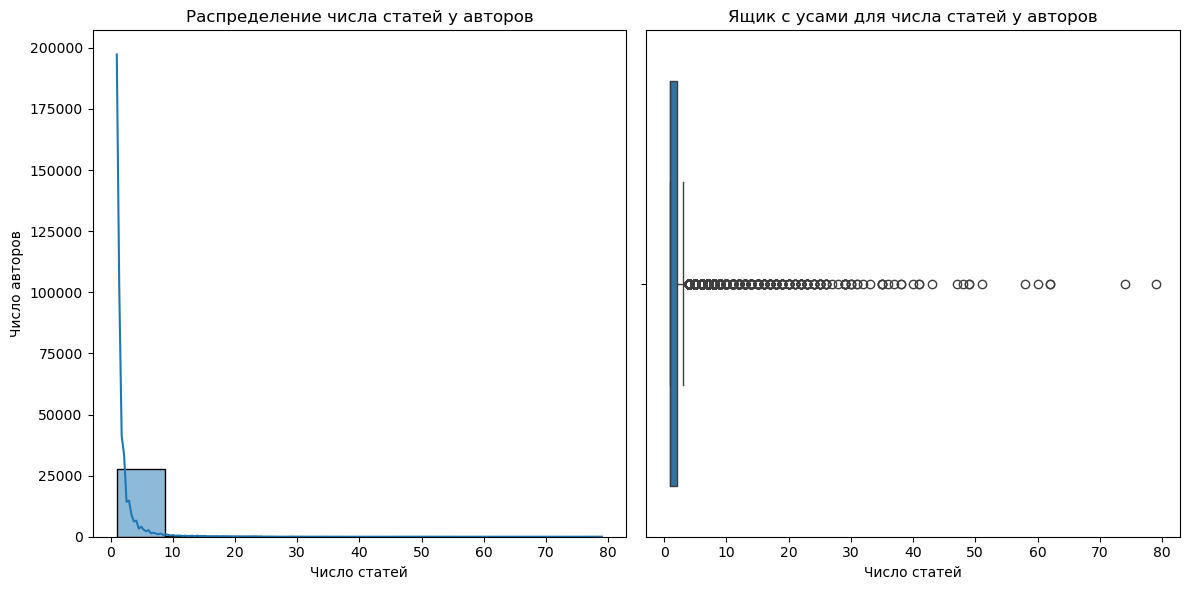

In [186]:
all_authors = []

for authors in filtered_authors['authors_list']:
    for author in authors:
        all_authors.append(author)

# Считаем количество статей для каждого автора
author_counts = pd.Series(all_authors).value_counts()

# Строим графики
plt.figure(figsize=(12, 6))

# График распределения
plt.subplot(1, 2, 1)
sns.histplot(author_counts, bins=10, kde=True)
plt.title('Распределение числа статей у авторов')
plt.xlabel('Число статей')
plt.ylabel('Число авторов')

# График "ящик с усами"
plt.subplot(1, 2, 2)
sns.boxplot(x=author_counts)
plt.title('Ящик с усами для числа статей у авторов')
plt.xlabel('Число статей')

plt.tight_layout()
plt.show()

### Распределение статей для авторов

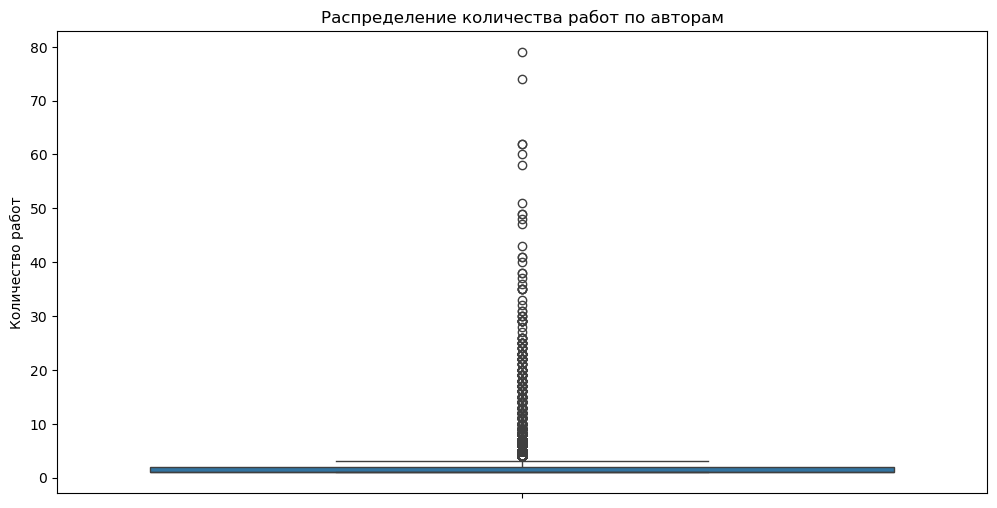

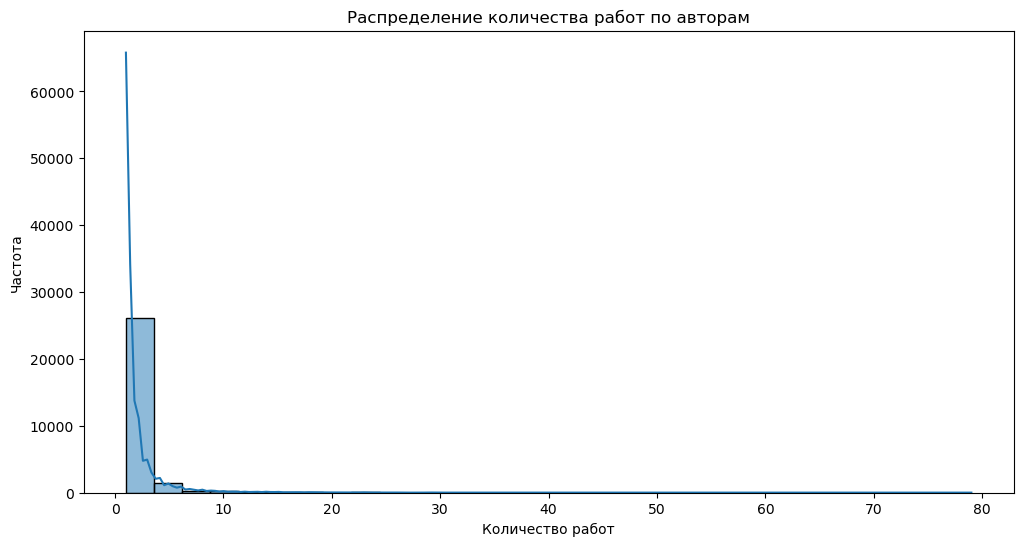

In [187]:
authors_exp = filtered_authors.explode('authors_list')

author_counts = authors_exp['authors_list'].value_counts().reset_index()
author_counts.columns = ['author', 'paper_count']

# Строим Boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(data=author_counts, y='paper_count')
plt.title('Распределение количества работ по авторам')
plt.ylabel('Количество работ')
plt.show()

# Строим гистограмму распределения
plt.figure(figsize=(12, 6))
sns.histplot(data=author_counts, x='paper_count', bins=30, kde=True)
plt.title('Распределение количества работ по авторам')
plt.xlabel('Количество работ')
plt.ylabel('Частота')
plt.show()

### Медиана и среднее число работ у автора

In [188]:
mean = author_counts['paper_count'].mean()
median = author_counts['paper_count'].median()
print(f"Медиана - {median}, среднее - {mean}")

Медиана - 1.0, среднее - 1.7864398439422164


In [189]:
author_counts[author_counts['paper_count'] > median].count()


author         7783
paper_count    7783
dtype: int64

### Статистика по авторам с больше чем одной работой

In [190]:
authors_often = author_counts[author_counts['paper_count'] > median]

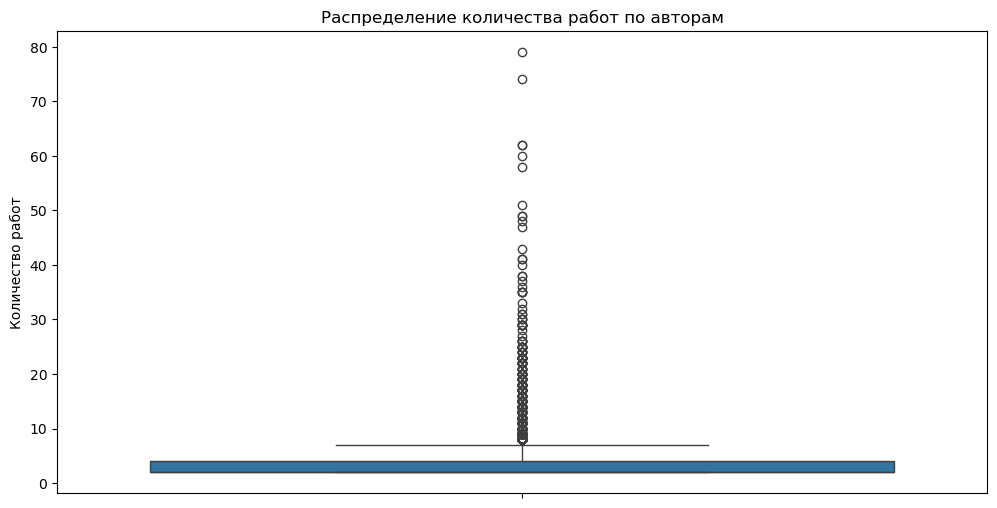

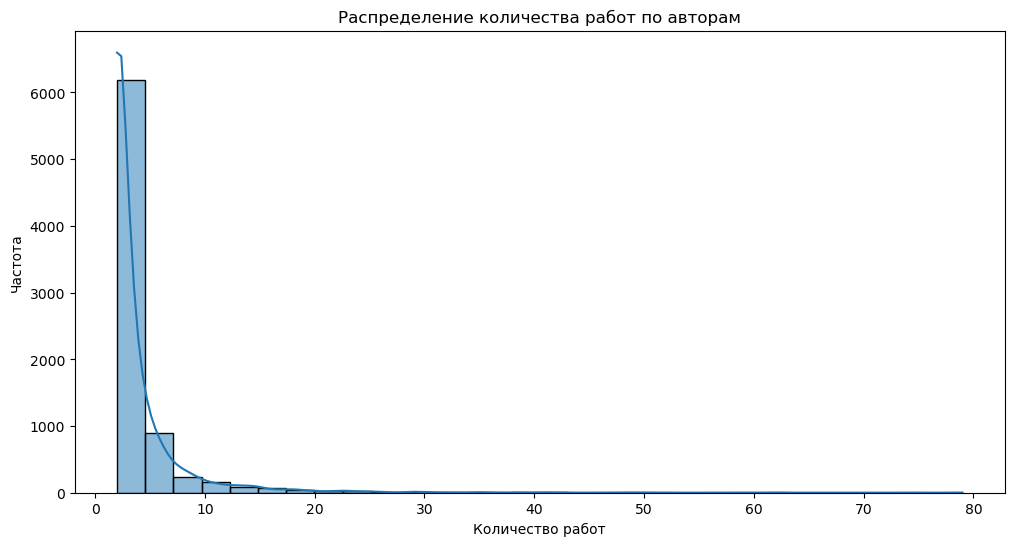

In [191]:
# Строим Boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(data=authors_often, y='paper_count')
plt.title('Распределение количества работ по авторам')
plt.ylabel('Количество работ')
plt.show()

# Строим гистограмму распределения
plt.figure(figsize=(12, 6))
sns.histplot(data=authors_often, x='paper_count', bins=30, kde=True)
plt.title('Распределение количества работ по авторам')
plt.xlabel('Количество работ')
plt.ylabel('Частота')
plt.show()

In [192]:
mean = authors_often['paper_count'].mean()
median = authors_often['paper_count'].median()
print(f"Медиана - {median}, среднее - {mean}")

Медиана - 2.0, среднее - 3.8748554541950404


### Распределение команд по числу работ

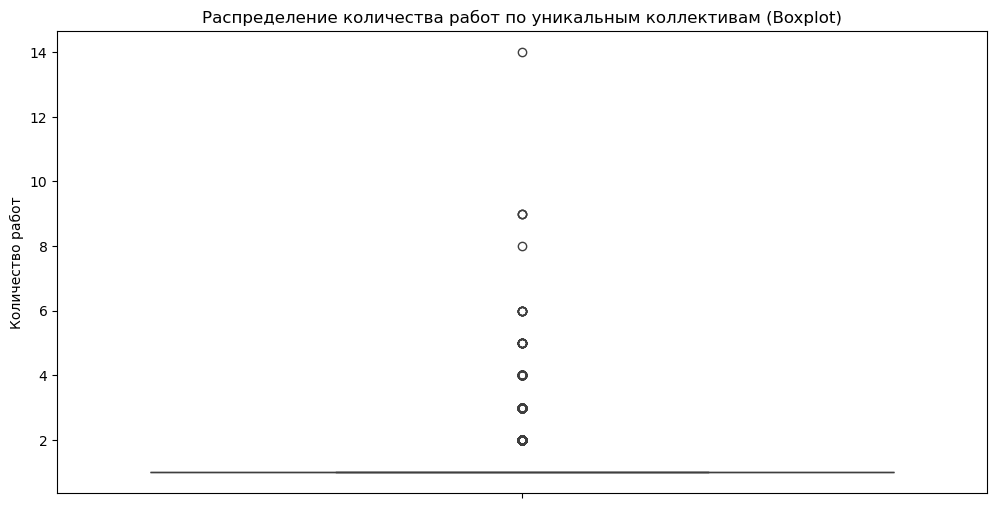

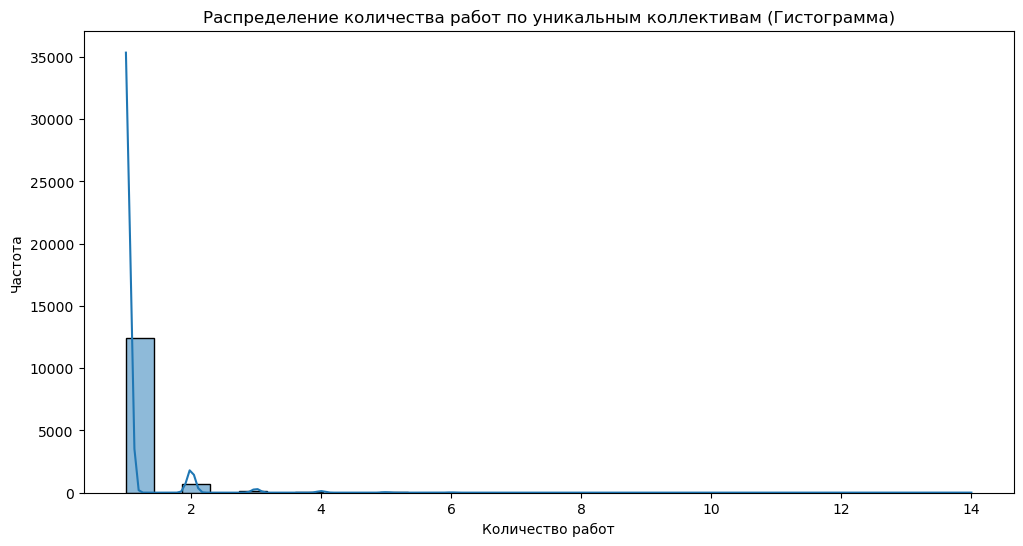

In [193]:
# Фильтруем работы, где количество авторов > 1
collectives = filtered_authors[filtered_authors['authors_list'].apply(len) > 1].copy()

# Создаём уникальный идентификатор для каждого коллектива авторов
collectives.loc[:, 'author_team'] = collectives['authors_list'].apply(
    lambda x: tuple(sorted([a for a in x if pd.notna(a)]))  # Фильтруем NaN внутри списка
)

# Считаем количество работ для каждого уникального коллектива
team_counts = collectives['author_team'].value_counts().reset_index()
team_counts.columns = ['author_team', 'paper_count']

# Boxplot для уникальных коллективов
plt.figure(figsize=(12, 6))
sns.boxplot(data=team_counts, y='paper_count')
plt.title('Распределение количества работ по уникальным коллективам (Boxplot)')
plt.ylabel('Количество работ')
plt.show()

# Гистограмма для уникальных коллективов
plt.figure(figsize=(12, 6))
sns.histplot(data=team_counts, x='paper_count', bins=30, kde=True)
plt.title('Распределение количества работ по уникальным коллективам (Гистограмма)')
plt.xlabel('Количество работ')
plt.ylabel('Частота')
plt.show()

In [194]:
team_counts.shape

(13272, 2)

In [195]:
team_counts['paper_count'].describe()

count    13272.000000
mean         1.086197
std          0.405986
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max         14.000000
Name: paper_count, dtype: float64

### Диаграмма размеров команд

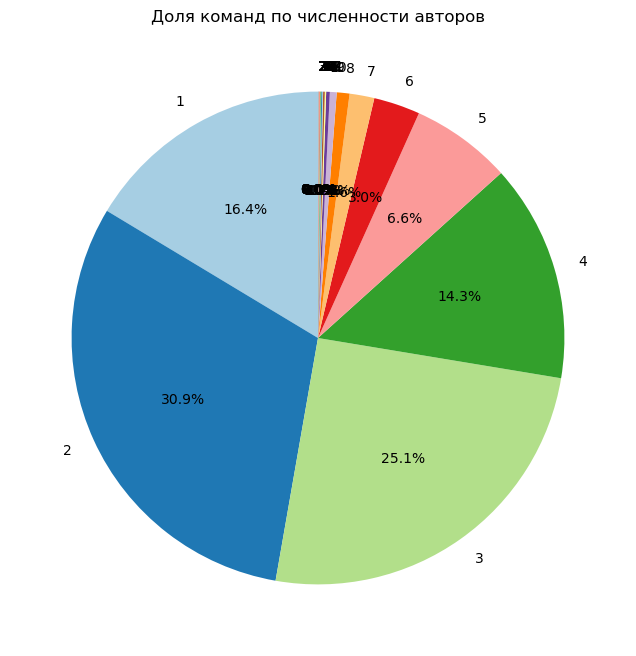

In [196]:
# Посчитать количество команд для каждой численности
team_sizes = filtered_authors['authors_list'].apply(len)
size_counts = team_sizes.value_counts().sort_index()

# Построить круговую диаграмму
plt.figure(figsize=(10, 8))
plt.pie(
    size_counts,
    labels=size_counts.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=plt.cm.Paired.colors
)
plt.title('Доля команд по численности авторов')
plt.show()


In [197]:
team_sizes.max()

74

In [198]:
size_counts

authors_list
1     2822
2     5322
3     4334
4     2463
5     1139
6      525
7      280
8      144
9       77
10      41
11      15
12      19
13      10
14      11
15       7
16       6
17       5
18       4
19       2
20       2
21       3
22       2
23       1
28       1
30       1
72       1
74       1
Name: count, dtype: int64

In [199]:
arxiv_text = pd.read_csv('results.csv')
arxiv_text.shape


(9808, 2)

In [200]:
arxiv_text.head()

id                                          full_text
0   0  J o u r n a l o f A r t i(cid:12) c ia l I n t...
1   1  J o u r n a l o f A r t i(cid:12) c ia l I n t...
2   2  J o u r n a l o f A r t i(cid:12) c ia l I n t...
3   3  J o u r n a l o f A r t i(cid:12) c ia l I n t...
4   4  Journal of Artificial Intelligence Research 1 ...

In [201]:
len(arxiv_text['id'].unique())

9808

Объединение датасетов с текстами

In [202]:
df1_text = data_nips[['paper_text']].rename(columns={'paper_text': 'text'})
df2_text = arxiv_text[['full_text']].rename(columns={'full_text': 'text'})

# Объединяем датафреймы
combined_df = pd.concat([df1_text, df2_text], ignore_index=True)


In [203]:
combined_df

text
0      767\n\nSELF-ORGANIZATION OF ASSOCIATIVE DATABA...
1      683\n\nA MEAN FIELD THEORY OF LAYER IV OF VISU...
2      394\n\nSTORING COVARIANCE BY THE ASSOCIATIVE\n...
3      Bayesian Query Construction for Neural\nNetwor...
4      Neural Network Ensembles, Cross\nValidation, a...
...                                                  ...
17044  Barcelona, 8-9 September 2011\nILexicOn: towar...
17045  Transmission of distress in a bank credit netw...
17046  2011 Fourth IEEE International Conference on U...
17047  5102\nyaM\n41\n]OL.sc[\n3v9585.4021:viXra\nOn ...
17048  2102\nrpA\n62\n]IA.sc[\n1v0295.4021:viXra\nQua...

[17049 rows x 1 columns]

# Подготовка данных (лемматизация, стемминг, удаление стоп слов)

Full texts

In [204]:
import re
import nltk
from nltk.corpus import stopwords
import spacy

# Увеличиваем лимит длины текста для spaCy
nlp = spacy.load("en_core_web_sm", disable=["parser", "ner"])
nlp.max_length = 2500000  # Увеличиваем лимит до 2.5 млн символов

def process_text(text, chunk_size=50000):  # Уменьшаем размер части
    text = text.lower()
    text = re.sub(r'[^\w\s]', '', text)
    words = nltk.word_tokenize(text)
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word not in stop_words]

    # Разбиваем текст на более мелкие части
    chunks = [' '.join(words[i:i + chunk_size]) for i in range(0, len(words), chunk_size)]
    lemmatized_words = []

    # Используем nlp.pipe для эффективной обработки
    for doc in nlp.pipe(chunks, batch_size=50):
        lemmatized_words.extend([token.lemma_ for token in doc])

    return lemmatized_words

In [205]:
from tqdm import tqdm
import pandas as pd
tqdm.pandas()


In [206]:

# Загружаем модель spaCy
nlp = spacy.load("en_core_web_sm", disable=["parser", "ner"])

# Функция для сохранения результата в файл
def save_results(df, filename):
    df.to_csv(filename, index=False)
    print(f"Результаты сохранены в {filename}")

# Разбиваем датафрейм на 4 части
quarter_size = len(combined_df) // 4
quarters = [
    combined_df.iloc[i * quarter_size : (i + 1) * quarter_size]
    for i in range(4)
]




In [207]:
# Обрабатываем каждую четверть с сохранением результата
for i, quarter_df in enumerate(quarters, 1):
    print(f"Обработка {i}-й четверти...")
    quarter_df['processed_text'] = quarter_df['text'].progress_apply(process_text)
    save_results(quarter_df, f"processed_quarter_{i}.csv")

# Обрабатываем весь датафрейм и сохраняем итоговый результат
print("Обработка всего датафрейма...")
combined_df['processed_text'] = combined_df['text'].progress_apply(process_text)
save_results(combined_df, "processed_full.csv")

Обработка 1-й четверти...


100%|██████████| 4262/4262 [17:24<00:00,  4.08it/s]  
C:\Users\Vizor\AppData\Local\Temp\ipykernel_30656\3846046227.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  quarter_df['processed_text'] = quarter_df['text'].progress_apply(process_text)


KeyboardInterrupt: 

In [208]:
df = pd.read_csv("processed_quarter_1.csv")

In [209]:
import pandas as pd
import pickle
from tools.Vectorizers import BertVectorizer
from tqdm import tqdm

# Инициализируем векторизатор
vectorizer = BertVectorizer()

# Список файлов с четвертями
quarter_files = [
    "processed_quarter_1.csv",
    "processed_quarter_2.csv",
    "processed_quarter_3.csv",
    "processed_quarter_4.csv"
]

for file in quarter_files:
    # Загружаем данные
    df = pd.read_csv(file)

    # Инициализируем список для векторов
    vectors = []

    # Применяем векторизацию с tqdm для отображения прогресса
    for text in tqdm(df['processed_text'], desc=f"Обработка {file}"):
        # Преобразуем список токенов в строку
        text_str = ' '.join(map(str, text)) if isinstance(text, list) else str(text)
        # Получаем вектор
        vector = vectorizer.transform(text_str)
        vectors.append(vector)

    # Сохраняем векторы в pickle
    output_file = file.replace(".csv", "_vectors.pkl")
    with open(output_file, 'wb') as f:
        pickle.dump(vectors, f)

    print(f"Векторы для {file} сохранены в {output_file}")


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Vizor\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Vizor\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Vizor\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
c:\Users\Vizor\anaconda3\envs\NIR\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Обработка processed_quarter_1.csv: 100%|██████████| 3010/3010 [01:18<00:00, 38.22it/s]


Векторы для processed_quarter_1.csv сохранены в processed_quarter_1_vectors.pkl


Обработка processed_quarter_2.csv: 100%|██████████| 4262/4262 [03:34<00:00, 19.87it/s]


Векторы для processed_quarter_2.csv сохранены в processed_quarter_2_vectors.pkl


Обработка processed_quarter_3.csv: 100%|██████████| 4262/4262 [04:06<00:00, 17.27it/s]


Векторы для processed_quarter_3.csv сохранены в processed_quarter_3_vectors.pkl


Обработка processed_quarter_4.csv: 100%|██████████| 4262/4262 [06:11<00:00, 11.47it/s]

Векторы для processed_quarter_4.csv сохранены в processed_quarter_4_vectors.pkl


In [210]:
import numpy as np
import pandas as pd
import pickle
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import StandardScaler, Normalizer
from sklearn.metrics.pairwise import cosine_similarity, pairwise_distances
from typing import Union, List, Dict, Tuple

def cluster_vectors(
    files: Union[str, List[str]],
    n_components: int = 10,
    n_clusters: int = 5,
    eps: float = 0.5,
    min_samples: int = 5,
    use_cosine: bool = False,
) -> Tuple[pd.DataFrame, Dict[str, Dict[str, float]]]:
    """
    Выполняет кластеризацию векторов с использованием SVD, K-Means и DBSCAN.
    Поддерживает использование косинусового расстояния.

    Args:
        files: Путь к одному файлу или список путей к файлам с векторами.
        n_components: Количество компонент после SVD.
        n_clusters: Количество кластеров для K-Means.
        eps: Параметр DBSCAN для радиуса окрестности.
        min_samples: Минимальное количество точек для формирования кластера в DBSCAN.
        use_cosine: Использовать косинусовое расстояние для кластеризации.

    Returns:
        Tuple[pd.DataFrame, Dict[str, Dict[str, float]]]:
            - pd.DataFrame: Датафрейм с векторами и метками кластеров.
            - Dict: Словарь с метриками для каждого метода кластеризации.
    """
    # Загружаем векторы из файлов
    all_vectors = []
    if isinstance(files, str):
        files = [files]
    for file in files:
        vectors_file = file.replace(".csv", "_vectors.pkl")
        with open(vectors_file, 'rb') as f:
            vectors = pickle.load(f)
        all_vectors.extend(vectors)

    # Преобразуем в массив numpy
    all_vectors = np.array(all_vectors)

    # Нормализуем данные
    if use_cosine:
        normalizer = Normalizer()
        normalized_vectors = normalizer.fit_transform(all_vectors)
    else:
        scaler = StandardScaler()
        normalized_vectors = scaler.fit_transform(all_vectors)

    # Применяем SVD для снижения размерности
    svd = TruncatedSVD(n_components=n_components, random_state=42)
    reduced_vectors = svd.fit_transform(normalized_vectors)

    # Выводим объяснённую дисперсию
    explained_variance = svd.explained_variance_ratio_.sum()

    # Вычисляем матрицу расстояний
    if use_cosine:
        similarity_matrix = cosine_similarity(reduced_vectors)
        distance_matrix = 1 - similarity_matrix
        distance_matrix = np.maximum(distance_matrix, 0)
        affinity_matrix = similarity_matrix
    else:
        distance_matrix = pairwise_distances(reduced_vectors, metric='euclidean')
        affinity_matrix = None

    # Инициализируем словарь для метрик
    metrics = {
        'svd': {'explained_variance': explained_variance},
        'kmeans': {},
        'dbscan': {}
    }

    # K-Means кластеризация
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans_clusters = kmeans.fit_predict(reduced_vectors)

    kmeans_silhouette = silhouette_score(reduced_vectors, kmeans_clusters, metric='cosine' if use_cosine else 'euclidean')
    kmeans_calinski = calinski_harabasz_score(reduced_vectors, kmeans_clusters)
    kmeans_davies = davies_bouldin_score(reduced_vectors, kmeans_clusters)

    metrics['kmeans'] = {
        'silhouette': kmeans_silhouette,
        'calinski_harabasz': kmeans_calinski,
        'davies_bouldin': kmeans_davies
    }

    # DBSCAN кластеризация
    if use_cosine:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples, metric='precomputed')
        dbscan_clusters = dbscan.fit_predict(distance_matrix)
    else:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples, metric='euclidean')
        dbscan_clusters = dbscan.fit_predict(reduced_vectors)

    n_dbscan_clusters = len(set(dbscan_clusters)) - (1 if -1 in dbscan_clusters else 0)
    metrics['dbscan']['n_clusters'] = n_dbscan_clusters

    print(f"Количество кластеров (DBSCAN): {n_dbscan_clusters}")

    if n_dbscan_clusters > 1:
        dbscan_silhouette = silhouette_score(
            reduced_vectors,
            dbscan_clusters,
            metric='cosine' if use_cosine else 'euclidean'
        )
        dbscan_calinski = calinski_harabasz_score(reduced_vectors, dbscan_clusters)
        dbscan_davies = davies_bouldin_score(reduced_vectors, dbscan_clusters)

        metrics['dbscan'].update({
            'silhouette': dbscan_silhouette,
            'calinski_harabasz': dbscan_calinski,
            'davies_bouldin': dbscan_davies
        })
    else:
        print("Недостаточно кластеров для оценки Silhouette Score (DBSCAN)")

    # Сохраняем результаты
    result_df = pd.DataFrame({
        'vector': list(all_vectors),
        'kmeans_cluster': kmeans_clusters,
        'dbscan_cluster': dbscan_clusters,
    })

    return result_df, metrics


In [211]:
import numpy as np
import pandas as pd
from tqdm import tqdm

# Инициализация переменных для хранения лучших значений метрик и параметров
best_silhouette = {'value': -1, 'n_components': 0, 'n_clusters': 0}
best_calinski = {'value': -100, 'n_components': 0, 'n_clusters': 0}
best_davies = {'value': 1000, 'n_components': 0, 'n_clusters': 0}

# Диапазоны для перебора параметров
cluster_range = range(2, 15)
component_range = range(2, 50)

# Создаем прогресс-бар для общего количества итераций
total_iterations = len(cluster_range) * len(component_range)
progress_bar = tqdm(total=total_iterations, desc="Поиск оптимальных параметров")
save_print = print
print = lambda x: None
# Перебор всех комбинаций параметров
for n_clusters in cluster_range:
    for n_components in component_range:
         # Выполняем кластеризацию
        result_df, metrics = cluster_vectors(
                files=[
                    "processed_quarter_1.csv",
                    "processed_quarter_2.csv",
                    "processed_quarter_3.csv",
                    "processed_quarter_4.csv"
                ],
                n_components=n_components,
                n_clusters=n_clusters,
                use_cosine=True,
        )

            # Проверяем и обновляем лучшие значения для Silhouette Score
        if metrics['kmeans']['silhouette'] > best_silhouette['value']:
            best_silhouette.update({
                'value': metrics['kmeans']['silhouette'],
                'n_components': n_components,
                'n_clusters': n_clusters
            })

        # Проверяем и обновляем лучшие значения для Calinski-Harabasz Index
        if metrics['kmeans']['calinski_harabasz'] > best_calinski['value']:
            best_calinski.update({
                'value': metrics['kmeans']['calinski_harabasz'],
                'n_components': n_components,
                'n_clusters': n_clusters
            })

            # Проверяем и обновляем лучшие значения для Davies-Bouldin Index
        if metrics['kmeans']['davies_bouldin'] < best_davies['value']:
            best_davies.update({
                'value': metrics['kmeans']['davies_bouldin'],
                'n_components': n_components,
                'n_clusters': n_clusters
            })

            # Выводим текущий прогресс в описании прогресс-бара
        progress_bar.set_postfix({
            'n_components': n_components,
            'n_clusters': n_clusters,
            'Silhouette': f"{metrics['kmeans']['silhouette']:.3f}",
            'Calinski': f"{metrics['kmeans']['calinski_harabasz']:.3f}",
            'Davies': f"{metrics['kmeans']['davies_bouldin']:.3f}"
        })

        # Обновляем прогресс-бар
        progress_bar.update(1)

# Закрываем прогресс-бар
progress_bar.close()
print = save_print
# Выводим лучшие параметры для каждой метрики
print("\nЛучшие параметры:")
print(f"Silhouette Score: {best_silhouette['value']:.3f} "
      f"(n_components={best_silhouette['n_components']}, n_clusters={best_silhouette['n_clusters']})")

print(f"Calinski-Harabasz Index: {best_calinski['value']:.3f} "
      f"(n_components={best_calinski['n_components']}, n_clusters={best_calinski['n_clusters']})")

print(f"Davies-Bouldin Index: {best_davies['value']:.3f} "
      f"(n_components={best_davies['n_components']}, n_clusters={best_davies['n_clusters']})")



Поиск оптимальных параметров:   0%|          | 0/624 [00:00<?, ?it/s]c:\Users\Vizor\anaconda3\envs\NIR\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
Поиск оптимальных параметров:   0%|          | 1/624 [00:21<3:41:17, 21.31s/it, n_components=2, n_clusters=2, Silhouette=0.706, Calinski=21876.217, Davies=0.718]c:\Users\Vizor\anaconda3\envs\NIR\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
Поиск оптимальных параметров:   0%|          | 2/624 [00:32<2:37:44, 15.22s/it, n_components=3, n_clusters=2, Silhouette=0.462, Calinski=7611.214, Davies=1.285] c:\Users\Vizor\anaconda3\envs\NIR\lib\sit


Лучшие параметры:
Silhouette Score: 0.706 (n_components=2, n_clusters=2)
Calinski-Harabasz Index: 22204.240 (n_components=2, n_clusters=3)
Davies-Bouldin Index: 0.718 (n_components=2, n_clusters=2)


In [212]:
cluster_vectors(
    files=[
        "processed_quarter_1.csv",
        "processed_quarter_2.csv",
        "processed_quarter_3.csv",
        "processed_quarter_4.csv"
    ],
    n_components=best_davies['n_components'],
    n_clusters=best_davies['n_clusters'],
    use_cosine=True,
)


c:\Users\Vizor\anaconda3\envs\NIR\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Количество кластеров (DBSCAN): 1
Недостаточно кластеров для оценки Silhouette Score (DBSCAN)


(                                                  vector  kmeans_cluster  \
 0      [0.0099991, -0.10981016, -0.08808486, -0.01454...               0   
 1      [0.0031406295, -0.14915568, 0.0032414321, -0.0...               0   
 2      [0.026768088, -0.12371017, -0.025623064, 0.054...               0   
 3      [-0.014966274, -0.115779586, -0.030780878, -0....               0   
 4      [-0.02677255, -0.13028915, -0.024999151, -0.00...               0   
 ...                                                  ...             ...   
 15791  [0.0020591118, -0.061532382, -0.038142916, -0....               1   
 15792  [0.033312723, -0.10633759, -0.020687545, -0.02...               1   
 15793  [-0.021454362, -0.045001887, -0.03798238, 0.02...               1   
 15794  [-0.043652654, -0.046917647, -0.06585369, -0.0...               1   
 15795  [-0.018592129, -0.05088982, -0.085451156, -0.0...               0   
 
        dbscan_cluster  
 0                   0  
 1                   0  

# Методы выделения ключевых слов

In [213]:
df1 = pd.read_csv('processed_quarter_1.csv')
df2 = pd.read_csv('processed_quarter_2.csv')
df3 = pd.read_csv('processed_quarter_3.csv')
df4 = pd.read_csv('processed_quarter_4.csv')

In [214]:
texts = pd.concat([df1, df2, df3, df4], ignore_index=True)

In [215]:
texts

text  \
0      767\n\nSELF-ORGANIZATION OF ASSOCIATIVE DATABA...   
1      683\n\nA MEAN FIELD THEORY OF LAYER IV OF VISU...   
2      394\n\nSTORING COVARIANCE BY THE ASSOCIATIVE\n...   
3      Bayesian Query Construction for Neural\nNetwor...   
4      Neural Network Ensembles, Cross\nValidation, a...   
...                                                  ...   
15791  Knowledge revision in systems based on an info...   
15792  Barcelona, 8-9 September 2011\nILexicOn: towar...   
15793  Transmission of distress in a bank credit netw...   
15794  2011 Fourth IEEE International Conference on U...   
15795  5102\nyaM\n41\n]OL.sc[\n3v9585.4021:viXra\nOn ...   

                                          processed_text  
0      ['767', 'selforganization', 'associative', 'da...  
1      ['683', 'mean', 'field', 'theory', 'layer', 'i...  
2      ['394', 'store', 'covariance', 'associative', ...  
3      ['bayesian', 'query', 'construction', 'neural'...  
4      ['neural', 'network', 'ensemble', 'cross', 'va...  
...                                                  ...  
15791  ['knowledge', 'revision', 'system', 'base', 'i...  
15792  ['barcelona', '89', 'september', '2011', 'ilex...  
15793  ['transmission', 'distress', 'bank', 'credit',...  
15794  ['2011', 'fourth', 'ieee', 'international', 'c...  
15795  ['5102', 'yam', '41', 'olsc', '3v95854021vixra...  

[15796 rows x 2 columns]

In [217]:
from tools import keyWords

In [218]:
import torch
print(torch.cuda.is_available())
print(torch.version.cuda)
print(torch.cuda.get_device_name(0))


True
12.1
NVIDIA GeForce RTX 3060 Laptop GPU


In [219]:
import ast
texts['processed_text'] = texts['processed_text'].progress_apply(
    lambda x: ast.literal_eval(x) if pd.notna(x) else []
)


100%|██████████| 15796/15796 [05:16<00:00, 49.95it/s] 


In [220]:
texts['key_words_bert'] = None
texts['key_words_bert'] = texts['processed_text'].progress_apply(
        keyWords.extract_keywords_with_bert
    )

  0%|          | 0/15796 [00:00<?, ?it/s]

 58%|█████▊    | 9210/15796 [1:47:00<1:16:30,  1.43it/s]  


KeyboardInterrupt: 

In [ ]:
texts

text  \
0      767\n\nSELF-ORGANIZATION OF ASSOCIATIVE DATABA...   
1      683\n\nA MEAN FIELD THEORY OF LAYER IV OF VISU...   
2      394\n\nSTORING COVARIANCE BY THE ASSOCIATIVE\n...   
3      Bayesian Query Construction for Neural\nNetwor...   
4      Neural Network Ensembles, Cross\nValidation, a...   
...                                                  ...   
17043  Knowledge revision in systems based on an info...   
17044  Barcelona, 8-9 September 2011\nILexicOn: towar...   
17045  Transmission of distress in a bank credit netw...   
17046  2011 Fourth IEEE International Conference on U...   
17047  5102\nyaM\n41\n]OL.sc[\n3v9585.4021:viXra\nOn ...   

                                          processed_text  \
0      [767, selforganization, associative, database,...   
1      [683, mean, field, theory, layer, iv, visual, ...   
2      [394, store, covariance, associative, longterm...   
3      [bayesian, query, construction, neural, networ...   
4      [neural, network, ensemble, cross, validation,...   
...                                                  ...   
17043  [knowledge, revision, system, base, inform, tr...   
17044  [barcelona, 89, september, 2011, ilexicon, tow...   
17045  [transmission, distress, bank, credit, network...   
17046  [2011, fourth, ieee, international, conference...   
17047  [5102, yam, 41, olsc, 3v95854021vixra, complex...   

                                          key_words_bert  
0      [autonomous, algorithm, automation, robotic, a...  
1       [cortex, neural, neuroscience, neurosci, neuron]  
2      [hippocampal, hippocampus, synapsespecific, sy...  
3      [predictive, optimization, predict, selection,...  
4      [crossvalidation, accuracy, biasvariance, reli...  
...                                                  ...  
17043  [knowledgebase, search, mapping, guide, alexis...  
17044  [linguisticsvolume, semantic, lexicalize, lexi...  
17045  [creditnetwork, debt, httpebaeuropaeucapitalex...  
17046  [diagnosisofclientdeviceproblemsinprivatecloud...  
17047  [rameterizedcomplexity, complexity, reducingto...  

[17048 rows x 3 columns]

In [221]:
texts['key_words_yake'] = None
texts['key_words_yake'] = texts['processed_text'].progress_apply(keyWords.extract_keywords_with_yake)

100%|██████████| 15796/15796 [41:05<00:00,  6.41it/s] 


In [222]:
texts

text  \
0      767\n\nSELF-ORGANIZATION OF ASSOCIATIVE DATABA...   
1      683\n\nA MEAN FIELD THEORY OF LAYER IV OF VISU...   
2      394\n\nSTORING COVARIANCE BY THE ASSOCIATIVE\n...   
3      Bayesian Query Construction for Neural\nNetwor...   
4      Neural Network Ensembles, Cross\nValidation, a...   
...                                                  ...   
15791  Knowledge revision in systems based on an info...   
15792  Barcelona, 8-9 September 2011\nILexicOn: towar...   
15793  Transmission of distress in a bank credit netw...   
15794  2011 Fourth IEEE International Conference on U...   
15795  5102\nyaM\n41\n]OL.sc[\n3v9585.4021:viXra\nOn ...   

                                          processed_text key_words_bert  \
0      [767, selforganization, associative, database,...           None   
1      [683, mean, field, theory, layer, iv, visual, ...           None   
2      [394, store, covariance, associative, longterm...           None   
3      [bayesian, query, construction, neural, networ...           None   
4      [neural, network, ensemble, cross, validation,...           None   
...                                                  ...            ...   
15791  [knowledge, revision, system, base, inform, tr...           None   
15792  [barcelona, 89, september, 2011, ilexicon, tow...           None   
15793  [transmission, distress, bank, credit, network...           None   
15794  [2011, fourth, ieee, international, conference...           None   
15795  [5102, yam, 41, olsc, 3v95854021vixra, complex...           None   

                                          key_words_yake  
0      [(image, 0.0012752428308258363), (fig, 0.00129...  
1      [(cell, 0.0010118797217038334), (network, 0.00...  
2      [(input, 0.0008811158149560918), (weak, 0.0009...  
3      [(loss, 0.0006260442487647184), (query, 0.0015...  
4      [(error, 0.0009863558047607185), (network, 0.0...  
...                                                  ...  
15791  [(knowledge, 0.0005059714240815628), (problem,...  
15792  [(lexical, 0.000402528957444968), (semantic, 0...  
15793  [(bank, 0.00010859768220471762), (credit, 0.00...  
15794  [(client, 0.0017999705719674644), (system, 0.0...  
15795  [(solution, 6.283829691855381e-05), (problem, ...  

[15796 rows x 4 columns]

In [ ]:
texts.to_csv("extracted_keywords.csv")

# Построение онтологии

### Метод TaxoGen

In [ ]:
from tqdm import tqdm
import pandas as pd
import ast
tqdm.pandas()
texts = pd.read_csv("extracted_keywords.csv")
texts['key_words_bert'] = texts['key_words_bert'].progress_apply(
    lambda x: ast.literal_eval(x) if pd.notna(x) else []
)

texts['key_words_yake'] = texts['key_words_yake'].progress_apply(
    lambda x: ast.literal_eval(x) if pd.notna(x) else []
)

In [ ]:
texts['key_words_bert']

2404     [clustering, mixturemodel, clustercenter, clus...
5227     [highprobabilitybound, optimize, highprobabili...
9334     [hypothesis, hypothese, hypothesise, inference...
12047              [logics, logicof, logica, logic, logik]
13953    [probabilistic, plausibility, proof, impossibi...
                               ...                        
10957    [humanrobotcollaborationtaskwhenworkingwithaci...
7222     [reinforcement, algorithms, abstraction, algor...
6029     [predictive, clinical, patients, nonparametric...
12735    [neuralnetworkweightsandimprovetheparameterswi...
2206     [likelihood, empirically, probability, bayesia...
Name: key_words_bert, Length: 3410, dtype: object

In [ ]:
from tools.Vectorizers import BertVectorizer
from tools.TaxoGen import TaxoGenBuilder
vectorizer = BertVectorizer()

builder = TaxoGenBuilder(
    vectorizer=vectorizer,
    df=texts,
    keywords_column="key_words_bert",
    max_depth=4,
    n_clusters=5
)

builder.build_taxonomy()
builder.save("taxonomy.ttl")




[nltk_data] Error loading punkt: [WinError 10054] Удаленный хост
[nltk_data]     принудительно разорвал существующее подключение
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Vizor\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Vizor\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
c:\Users\Vizor\anaconda3\envs\NIR\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Vectorizing: 100%|██████████| 46524/46524 [04:35<00:00, 168.64it/s]
c:\Users\Vizor\anaconda3\envs\NIR\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by se

In [ ]:
print("Depth:", builder.max_depth)

Depth: 4


In [ ]:
from rdflib.namespace import SKOS


In [ ]:
def print_taxonomy(graph):
    """
    Печатает таксономию (TaxoGen-style):
    - узел = кластер терминов
    - prefLabel = representative terms
    - altLabel = все термины кластера
    """

    # children: parent -> [children]
    children = {}
    parents = set()

    # labels
    pref = {}
    alt = {}

    for s, p, o in graph:
        if p == SKOS.narrower:
            children.setdefault(s, []).append(o)
            parents.add(o)
        elif p == SKOS.prefLabel:
            pref.setdefault(s, []).append(str(o))
        elif p == SKOS.altLabel:
            alt.setdefault(s, []).append(str(o))

    # корни = узлы без родителя
    roots = [
        node for node in pref
        if node not in parents
    ]

    def dfs(node, depth=0):
        indent = "  " * depth

        reps = ", ".join(pref.get(node, []))
        terms = ", ".join(alt.get(node, []))

        print(f"{indent}-->> Cluster")
        print(f"{indent}  Representative: {reps}")
        print(f"{indent}  Terms ({len(alt.get(node, []))}): {terms}")

        for child in children.get(node, []):
            dfs(child, depth + 1)

    for r in roots:
        dfs(r)


In [ ]:
builder.build_taxonomy()
print_taxonomy(builder.graph)


c:\Users\Vizor\anaconda3\envs\NIR\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=8.
  warnings.warn(
c:\Users\Vizor\anaconda3\envs\NIR\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Vizor\anaconda3\envs\NIR\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Vizor\anaconda3\envs\NIR\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is k

-->> Cluster
  Representative: 01isdonebypredicatetransformation_050thisaggregatestweetswithmissinginformationintothethirdkindofdetector_0mostpeoplesimplyrefertothesystemasexhibitingconsciousnesstocertainextentifφ_11ymaenoyohsawaandtitocatalystpersonalityforfosteringcommunicationamonggroup_14thacmieeeinternationalconferenceonhumanrobot_15mtowards_a_new_decision_theory_15puzzleissmallersotheidaalgorithmcanalwaysgivethesolution_16whichalsoprovidesanagentbasedintelligencemeasurethisobjectionmay_1941therehasbeenalotofworkonspecializedalgorithmssolvingproblemstakenfrommoreor_195230312712sparksofartificialgeneralintelligenceearlyexperimentswithgpt4_1987ithastobeensuredthattheoperationalsemantics_1995weshowthattheyalsogeneralizebelieffunction_1areconsistent2arenottrivialiethosewiththehighestprobabilityinthesense_1computerelectricalandmathematicalsciencesengineeringdivisioncemsecomputational_1czechacademyofsciencesinstituteofcomputersciencecasicspragueczechia_1departmentofcomputingscienceandth